<a href="https://colab.research.google.com/github/weversonmachado/MVP-II/blob/main/MVP_IIA_Weverson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador - Diagnósticos de pacientes com câncer de mama
**Aluno:** Weverson Machado de Oliveira

**Contexto:** Cancer de mama é o tipo de câncer mais freqüente na mulher brasileira. Nesta doença, ocorre um desenvolvimento anormal das células da mama, que multiplicam-se repetidamente até formarem um tumor maligno.

As características são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.
n o espaço tridimensional é aquele descrito em: [K. P. Bennett e O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Estrutura:** o notebook está dividio em:
1. Importação das bibliotecas
2. Carregando o Dataset do Git
3. Tratamento dos dados
4. Separação em conjunto de treino e conjunto de testes com holdout
5. Modelagem e Inferência
6. Criação e avaliação de modelos com dados padronizados e normalizados
7. Otimização dos hiperparâmetros
8. Finalização do Modelo

**Sobre o Dataset:**
O dataset está disponível no kaggle através do link:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


**Informações do atributo:**

1.   número de identificação
2.   Diagnóstico (M = maligno, B = benigno)

Dez características de valor real são computadas para cada núcleo celular:

1.   raio (média das distâncias do centro aos pontos do perímetro)
2.   textura (desvio padrão dos valores da escala de cinza)
3.   perímetro
4.   área
5.   suavidade (variação local nos comprimentos dos raios)
6.   compacidade (perímetro^2 / área - 1,0)
7.   concavidade (gravidade das porções côncavas do contorno)
8.   pontos côncavos (número de porções côncavas do contorno)
9.   simetria
10.  dimensão fractal ("aproximação da costa" - 1)

A média, erro padrão e "pior" ou maior (média dos três
maiores valores) desses recursos foram computados para cada imagem,
resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo
13 é o Raio SE, o campo 23 é o Pior Raio.

Distribuição de classes: 357 benignas, 212 malignas

# 1 - Importação das bibliotecas

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importações
import pandas as pd
import numpy as np
import sys
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

np.set_printoptions(threshold=sys.maxsize) # Propriedade setada para exibir "todos" os dados na tela e não somente uma parte no colab

# 2 - Carregando o Dataset do Git

In [2]:
# Leitura do dataset do Git
url = 'https://raw.githubusercontent.com/weversonmachado/MVP-II/main/breastCancer.csv'
df = pd.read_csv(url)

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Dimensões do dataset
df.shape

(569, 33)

# 3 - Tratamento dos dados

In [6]:
# Renomeando os nomes das colunas
df = df.rename(columns={'id':'id', 'diagnosis':'diagnostico', 'radius_mean':'media_do_raio', 'texture_mean':'media_da_textura', 'perimeter_mean':'media_do perimetro', 'area_mean':'area media', 'smoothness_mean':'suavidade_media',
                        'compactness_mean':'compactacao_media', 'concavity_mean':'concavidade_media', 'concave points_mean':'media_dos_pontos_concavos', 'symmetry_mean':'media_simetria', 'fractal_dimension_mean':'media_da_dimensao_fractal',
                        'radius_se':'erro_padrao_de_raio', 'texture_se':'erro_padrao_de_textura', 'perimeter_se':'erro_padrao_de_perimetro', 'area_se':'erro_padrao_de_area', 'smoothness_se':'erro_padrao_de_suavidade',
                        'compactness_se':'erro_padrao_de_compacidade', 'concavity_se':'erro_padrao_de_concavidade', 'concave points_se':'erro_padrao_de_pontos_concavos', 'symmetry_se':'erro_padrao_de_simetria',
                        'fractal_dimension_se':'erro_padrao_de_dimensao_fractal', 'radius_worst':'pior raio', 'texture_worst':'pior_textura', 'perimeter_worst':'perimetro_pior', 'area_worst':'area_pior', 'smoothness_worst':'suavidade_pior',
                        'compactness_worst':'pior_compactacao', 'concavity_worst':'pior_concavidade', 'concave points_worst':'pior_pontos_concavos', 'symmetry_worst':'simetria_pior', 'fractal_dimension_worst':'fractal_dimensao_pior'})

In [7]:
# Dimensões do dataset
df.shape

(569, 33)

In [8]:
# Descarta as colunas passadas
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

In [9]:
df.columns

Index(['diagnostico', 'media_do_raio', 'media_da_textura',
       'media_do perimetro', 'area media', 'suavidade_media',
       'compactacao_media', 'concavidade_media', 'media_dos_pontos_concavos',
       'media_simetria', 'media_da_dimensao_fractal', 'erro_padrao_de_raio',
       'erro_padrao_de_textura', 'erro_padrao_de_perimetro',
       'erro_padrao_de_area', 'erro_padrao_de_suavidade',
       'erro_padrao_de_compacidade', 'erro_padrao_de_concavidade',
       'erro_padrao_de_pontos_concavos', 'erro_padrao_de_simetria',
       'erro_padrao_de_dimensao_fractal', 'pior raio', 'pior_textura',
       'perimetro_pior', 'area_pior', 'suavidade_pior', 'pior_compactacao',
       'pior_concavidade', 'pior_pontos_concavos', 'simetria_pior',
       'fractal_dimensao_pior'],
      dtype='object')

In [10]:
# Dimensões do dataset
df.shape

(569, 31)

In [11]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   diagnostico                      569 non-null    object 
 1   media_do_raio                    569 non-null    float64
 2   media_da_textura                 569 non-null    float64
 3   media_do perimetro               569 non-null    float64
 4   area media                       569 non-null    float64
 5   suavidade_media                  569 non-null    float64
 6   compactacao_media                569 non-null    float64
 7   concavidade_media                569 non-null    float64
 8   media_dos_pontos_concavos        569 non-null    float64
 9   media_simetria                   569 non-null    float64
 10  media_da_dimensao_fractal        569 non-null    float64
 11  erro_padrao_de_raio              569 non-null    float64
 12  erro_padrao_de_textura

In [12]:
# Resumo estatístico do dataset
df.describe()

,media_do_raio,media_da_textura,media_do perimetro,area media,suavidade_media,compactacao_media,concavidade_media,media_dos_pontos_concavos,media_simetria,media_da_dimensao_fractal,...,pior raio,pior_textura,perimetro_pior,area_pior,suavidade_pior,pior_compactacao,pior_concavidade,pior_pontos_concavos,simetria_pior,fractal_dimensao_pior
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Utilizando o OneHotEncoder**

In [13]:
# HotEncoding
ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[['diagnostico']])

In [14]:
ohe.get_feature_names_out()

array(['diagnostico_B', 'diagnostico_M'], dtype=object)

In [15]:
# Array de valores
ohe_transform.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [16]:
# Transformando os dados em um dataframe
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [17]:
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,diagnostico_B,diagnostico_M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [18]:
# Concatenando as duas bases
df = pd.concat([df, df_ohe], axis=1)
df.head()


,diagnostico,media_do_raio,media_da_textura,media_do perimetro,area media,suavidade_media,compactacao_media,concavidade_media,media_dos_pontos_concavos,media_simetria,...,perimetro_pior,area_pior,suavidade_pior,pior_compactacao,pior_concavidade,pior_pontos_concavos,simetria_pior,fractal_dimensao_pior,diagnostico_B,diagnostico_M
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,1.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,1.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,1.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,1.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,1.0


In [19]:
# Descarta as colunas não necessárias
df.drop(["diagnostico", "diagnostico_M"], axis=1, inplace=True)
df.head()

,media_do_raio,media_da_textura,media_do perimetro,area media,suavidade_media,compactacao_media,concavidade_media,media_dos_pontos_concavos,media_simetria,media_da_dimensao_fractal,...,pior_textura,perimetro_pior,area_pior,suavidade_pior,pior_compactacao,pior_concavidade,pior_pontos_concavos,simetria_pior,fractal_dimensao_pior,diagnostico_B
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [20]:
# Renomeando os nomes das colunas
df = df.rename(columns={'diagnostico_B':'target'})
df.head()

,media_do_raio,media_da_textura,media_do perimetro,area media,suavidade_media,compactacao_media,concavidade_media,media_dos_pontos_concavos,media_simetria,media_da_dimensao_fractal,...,pior_textura,perimetro_pior,area_pior,suavidade_pior,pior_compactacao,pior_concavidade,pior_pontos_concavos,simetria_pior,fractal_dimensao_pior,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [21]:
df.shape

(569, 31)

# 4 - Separação em conjunto de treino e conjunto de teste com holdout

In [22]:
# Separação em bases de treino e teste (houdout)
array = df.values
X = array[:,0:30] # atributos
Y = array[:,30] # classe (target)

In [23]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=Y) # holdout com estratificação

In [24]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# 5 - Modelagem e Inferência

Criação e avaliação de modelos: linha base

Ada: 0.971401 (0.028191)
Bagging: 0.966908 (0.030104)
CART: 0.931981 (0.038351)
ET: 0.971401 (0.027964)
GB: 0.966957 (0.024633)
KNN: 0.922947 (0.036346)
LR: 0.951546 (0.026035)
NB: 0.934058 (0.027738)
RF: 0.967005 (0.036045)
SVM: 0.898696 (0.041344)
Voting: 0.951594 (0.025921)

#########################

Resultado escolhido: ET: 0.971401 (0.027964)


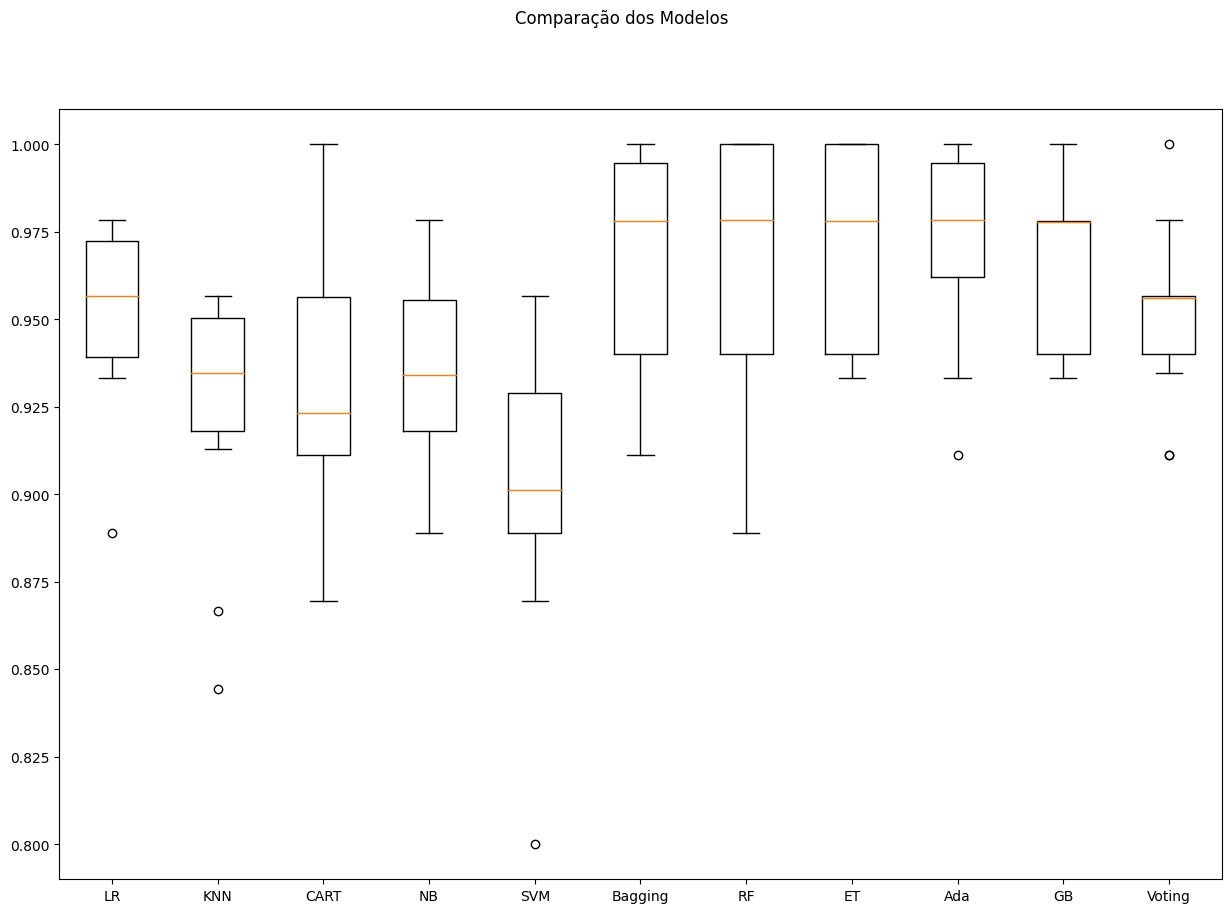

In [35]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
listaModelosResult = []
modeloMedia = .0
resultadoEscolhido = None
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    # print(msg)

    listaModelosResult.append(msg)
    if modeloMedia < cv_results.mean():
      modeloMedia = cv_results.mean()
      resultadoEscolhido = msg
    # print(msg)

listaModelosResult = sorted(listaModelosResult)
for li in listaModelosResult:
  print(li)

print("\n#########################\n")
print("Resultado escolhido: {}".format(resultadoEscolhido))

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6 - Criação e avaliação de modelos com dados padronizados e normalizados

Ada-norm: 0.971 (0.028)
Ada-orig: 0.971 (0.028)
Ada-padr: 0.971 (0.028)
Bag-norm: 0.971 (0.024)
Bag-orig: 0.967 (0.030)
Bag-padr: 0.965 (0.028)
CART-norm: 0.936 (0.036)
CART-orig: 0.932 (0.038)
CART-padr: 0.932 (0.033)
ET-norm: 0.971 (0.030)
ET-orig: 0.971 (0.028)
ET-padr: 0.974 (0.024)
GB-norm: 0.965 (0.024)
GB-orig: 0.967 (0.025)
GB-padr: 0.965 (0.024)
KNN-norm: 0.967 (0.028)
KNN-orig: 0.923 (0.036)
KNN-padr: 0.965 (0.024)
LR-norm: 0.963 (0.028)
LR-orig: 0.952 (0.026)
LR-padr: 0.982 (0.022)
NB-norm: 0.932 (0.030)
NB-orig: 0.934 (0.028)
NB-padr: 0.932 (0.030)
RF-norm: 0.963 (0.040)
RF-orig: 0.967 (0.036)
RF-padr: 0.969 (0.033)
SVM-norm: 0.976 (0.021)
SVM-orig: 0.899 (0.041)
SVM-padr: 0.976 (0.015)
Vot-norm: 0.974 (0.027)
Vot-orig: 0.952 (0.026)
Vot-padr: 0.976 (0.021)

#########################

Resultado escolhido: LR-padr: 0.982 (0.022)


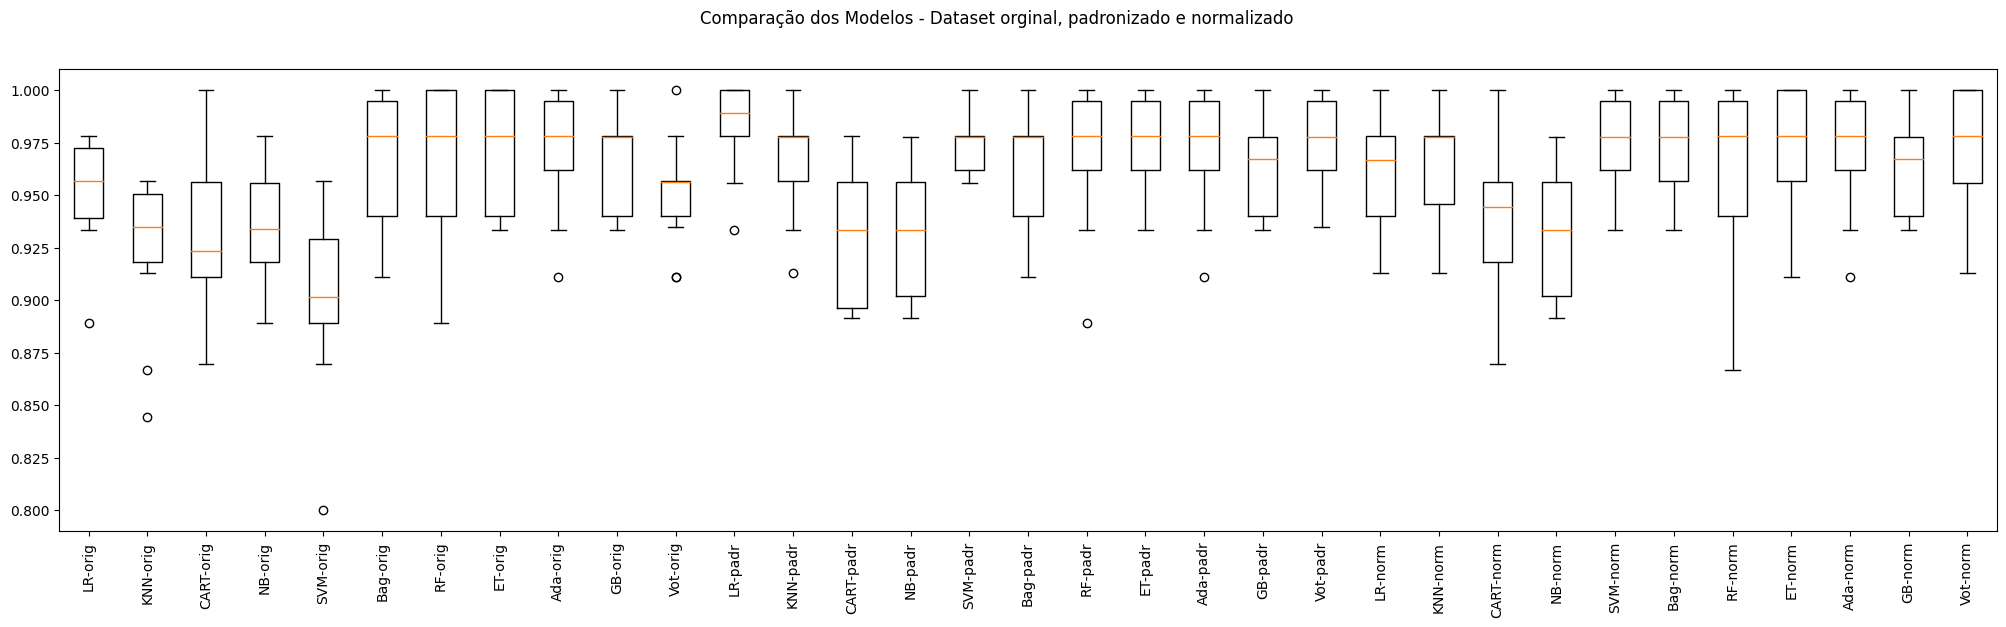

In [52]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
listaModelosResult = []
modeloMedia = .0
resultadoEscolhido = None
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais

    listaModelosResult.append(msg)
    if modeloMedia < cv_results.mean():
      modeloMedia = cv_results.mean()
      resultadoEscolhido = msg
    # print(msg)

listaModelosResult = sorted(listaModelosResult)
for li in listaModelosResult:
  print(li)

print("\n#########################\n")
print("Resultado escolhido: {}".format(resultadoEscolhido))

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 7 - Otimização dos hiperparâmetros

In [27]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.931739 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Sem tratamento de missings: knn-padr - Melhor: 0.969275 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.971449 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}


In [56]:
resultadoEscolhidoL = resultadoEscolhido.split(":")[0]
for i in range(len(pipelines)):
  print(pipelines[i])
  mod, _ = pipelines[i]
  print(mod)
  # for j in range(i):
  #   print(pipelines[i][j])


('LR-orig', Pipeline(steps=[('LR', LogisticRegression(max_iter=200))]))
LR-orig
('KNN-orig', Pipeline(steps=[('KNN', KNeighborsClassifier())]))
KNN-orig
('CART-orig', Pipeline(steps=[('CART', DecisionTreeClassifier())]))
CART-orig
('NB-orig', Pipeline(steps=[('NB', GaussianNB())]))
NB-orig
('SVM-orig', Pipeline(steps=[('SVM', SVC())]))
SVM-orig
('Bag-orig', Pipeline(steps=[('Bag',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=100))]))
Bag-orig
('RF-orig', Pipeline(steps=[('RF', RandomForestClassifier(max_features=3))]))
RF-orig
('ET-orig', Pipeline(steps=[('ET', ExtraTreesClassifier(max_features=3))]))
ET-orig
('Ada-orig', Pipeline(steps=[('Ada', AdaBoostClassifier(n_estimators=100))]))
Ada-orig
('GB-orig', Pipeline(steps=[('GB', GradientBoostingClassifier())]))
GB-orig
('Vot-orig', Pipeline(steps=[('Voting',
                 VotingClassifier(estimators=[('logistic',
                                          

# 8 - Finalização do Modelo

In [28]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9649122807017544
